In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/Twitter_Sentiment_Analysis_Neil

database.sqlite  Tweets.csv


Mounted at /content/drive
database.sqlite  Tweets.csv
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


183/183 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.6122 - loss: 0.9483 - val_accuracy: 0.6452 - val_loss: 0.8957
Epoch 2/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 53s 291ms/step - accuracy: 0.6284 - loss: 0.9222 - val_accuracy: 0.6452 - val_loss: 0.8994
Epoch 3/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 55s 301ms/step - accuracy: 0.6309 - loss: 0.9173 - val_accuracy: 0.6452 - val_loss: 0.8945
Epoch 4/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 79s 285ms/step - accuracy: 0.6222 - loss: 0.9262 - val_accuracy: 0.6452 - val_loss: 0.9015
Epoch 5/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 49s 270ms/step - accuracy: 0.6195 - loss: 0.9308 - val_accuracy: 0.6452 - val_loss: 0.8988
92/92 - 7s - 72ms/step - accuracy: 0.6452 - loss: 0.8988

✅ Validation Accuracy: 64.52%


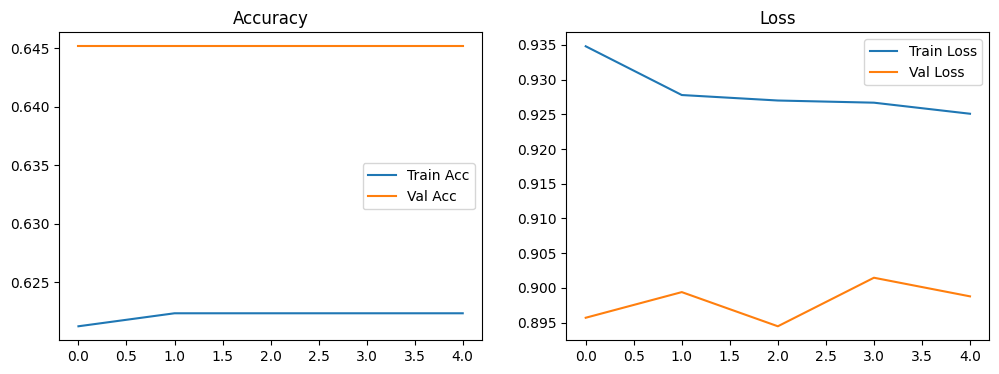

✅ Model saved successfully to Google Drive at:
/content/drive/MyDrive/Twitter_Sentiment_Analysis_Neil/rnn_twitter_sentiment_model.h5


In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls /content/drive/MyDrive/Twitter_Sentiment_Analysis_Neil

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import sqlite3

base_path = '/content/drive/MyDrive/Twitter_Sentiment_Analysis_Neil'

tweets_df = pd.read_csv(f'{base_path}/Tweets.csv')

print(tweets_df.head())

tweets_df = tweets_df[['text', 'airline_sentiment']]
tweets_df.dropna(inplace=True)
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
tweets_df['airline_sentiment'] = tweets_df['airline_sentiment'].map(label_mapping)

from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(tweets_df, test_size=0.2, random_state=42)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])

x_train = tokenizer.texts_to_sequences(train_df['text'])
x_val = tokenizer.texts_to_sequences(val_df['text'])

x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=max_len, padding='post', truncating='post')

y_train = np.array(train_df['airline_sentiment'])
y_val = np.array(val_df['airline_sentiment'])

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# --- Train Model ---
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=5,
                    batch_size=64)

# --- Evaluate Model ---
loss, acc = model.evaluate(x_val, y_val, verbose=2)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# --- Plot Accuracy & Loss ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

# --- Save Model ---
model.save(f'{base_path}/rnn_twitter_sentiment_model.h5')
print("✅ Model saved successfully to Google Drive at:")
print(f"{base_path}/rnn_twitter_sentiment_model.h5")

